# Linear Regression using Gradient Descent

## Math behind it
---

**Linear Regression Model**

We can predict an output $ y $ given an input $ x $ with the following linear model: 

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$$

Where:
- $ y^{(i)} $: observed/actual output (dependent variable)
- $ \hat{y}^{(i)} $: predicted output
- $ h_\theta(x^{(i)}) $: hypothesis function 
- $ x^{(i)} $: input (independent variable)
- $ \theta_0 $: intercept (bias)
- $ \theta_1 $: slope (weight)

<br><br>
Our goal is to minimize the Mean Squared Error (MSE) cost function iteratively untill we converge on its minimum through a process called gradient descent. 


<br><br>
**MSE Cost Function:**

The MSE measures the average squared difference between the predicted and the actual values in the dataset. Squaring the error, makes it so that the positive and negative differences dont cancel out, while also penalazing large mistakes more heavily compared to small ones. The convex(single minimum) nature of the MSE function in our simple application makes it so that when using gradient descent we dont get stuck in a local non-optimal minimum. 
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})^2
$$

Where:
- $ J(\theta) $: the cost function 
- $ m $: training set size


note: 

we multiply the cost function by $ \frac{1}{2} $ to make taking the derivatives simpler, hence the $ \frac{1}{2m} $ instead of 
$ \frac{1}{m} $, since multiplying the cost function by a scalar does not affect the location of its minimum 


<br><br>
**Gradient Descent**

The gradient descent algorithm updates the weights in an effort to find $ \theta $ that minimizes the cost, which will be in the direction of the negative gradient. The general update rule is as follows:  

$$
\theta := \theta - \alpha \nabla_\theta J(\theta)
$$
meaning, 
$$
\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta)
$$

Where: 
- $ \alpha $: learning rate

note: 

An appropriate choice of learning rate is crucial
- Too small: leads to slow convergence 
- Too large: may overshoot the minimum and lead to divergence 


<br><br>
**Final Update Rules**

computing the partial derivatives of the cost function gives us the following: 
$$
\frac{\partial }{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\frac{\partial }{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$
subbing it into our general update rule we get: 
$$
\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$

These updates are repeated until $ \theta_0 $ and $ \theta_1 $ converge on an optimal value that minimizes the cost function.

<br><br>
See the below images for the step-by-step math involved with computing the partial derivatives of the cost function: 

---

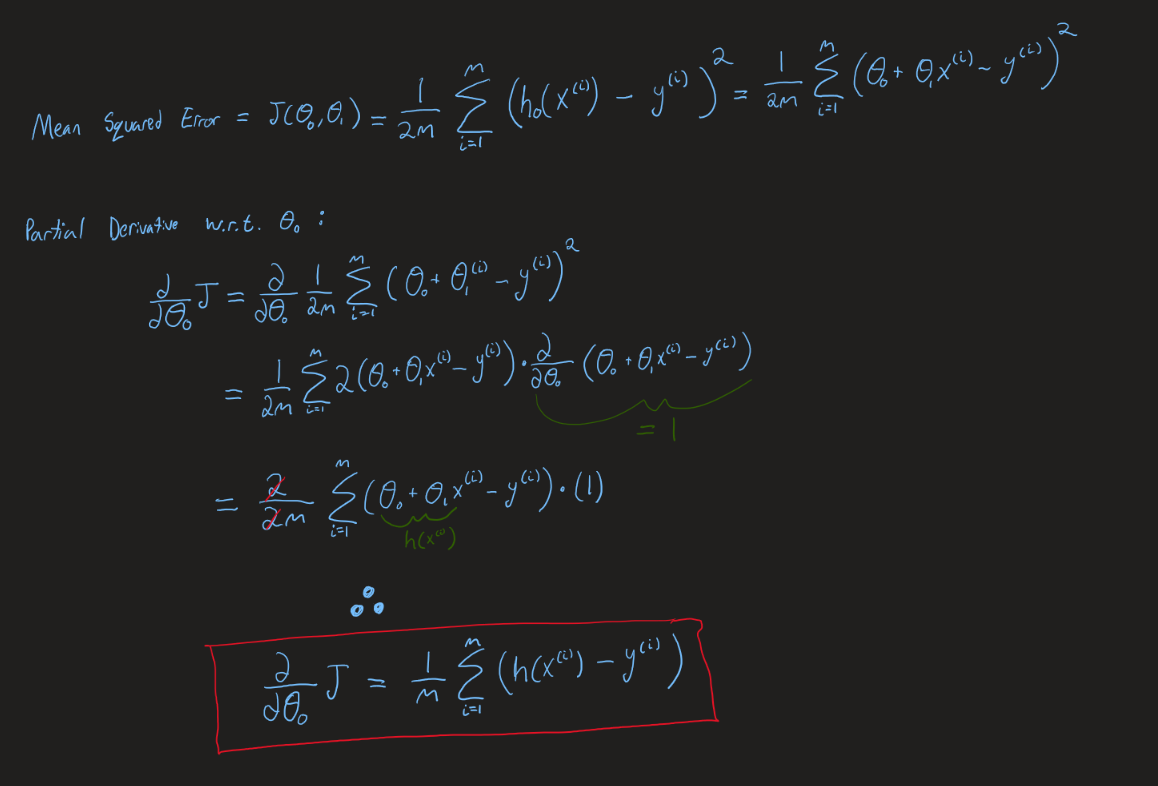
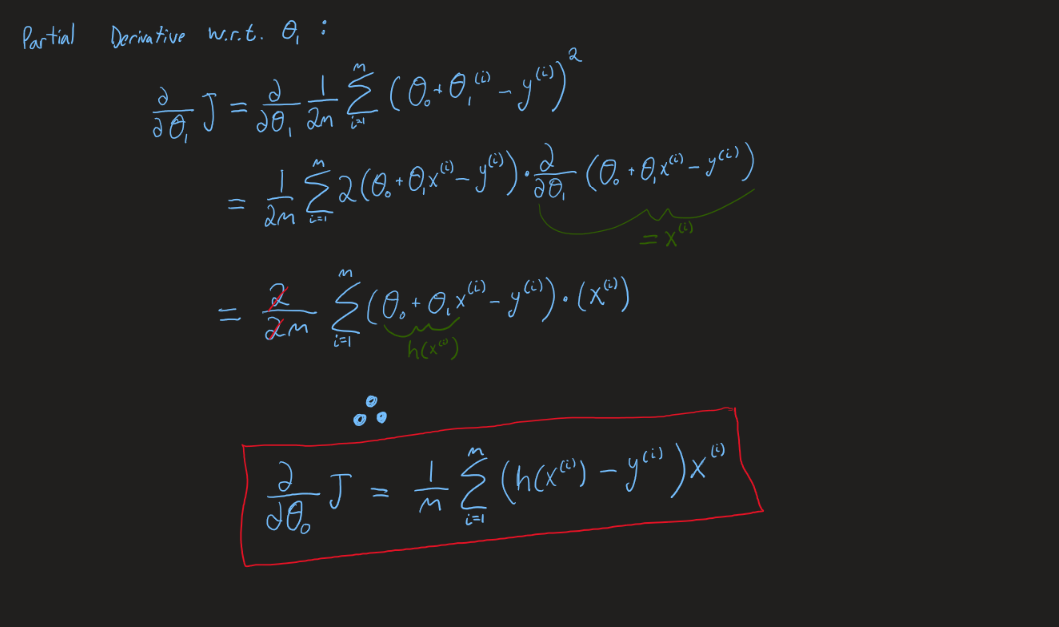

## Code
---

In [2]:
class LinearRegression:
    def __init__(self):
        self.theta_0 = 0.0  # Intercept
        self.theta_1 = 0.0  # Slope


    def fit(self, x, y, alpha=0.01,  epochs=100, verbose=0):
        for epoch in range(1, epochs + 1):
            y_pred = self.predict(x)
            grad_0, grad_1 = self._compute_gradients(x, y, y_pred)
            self._update_parameters(grad_0, grad_1, alpha) 

            if verbose != 0 and (epoch % verbose == 0 or epoch == 1 or epoch == epochs):
                print(f"Epoch: {epoch}/{epochs}, MSE: {self.mse(x, y):.6f}, theta_0: {self.theta_0:.4f}, theta_1: {self.theta_1:.4f}")


    def _compute_gradients(self, x, y, y_pred):
        m = len(x)
        
        grad_0 = sum(y_pred[i] - y[i] for i in range(m)) / m
        grad_1 = sum((y_pred[i] - y[i])*x[i] for i in range(m)) / m 
        
        return grad_0, grad_1
    
    def _update_parameters(self, grad_0, grad_1, alpha):
        self.theta_0 -= alpha * grad_0
        self.theta_1 -= alpha * grad_1 

    def predict(self, x_new):
        return [self.theta_0 + self.theta_1 * x_i for x_i in x_new]

    def mse(self, x, y):
        predictions = self.predict(x)
        m = len(predictions)
        return sum((predictions[i] - y[i]) ** 2 for i in range(len(y))) / m

    def coefficients(self):
        return  self.theta_0, self.theta_1  


## Testing Model
---

### Imports

In [3]:
%pip install matplotlib scikit-learn pandas --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Test #1: Syntethic Dataset - y=2x+1

Epoch: 1/100, MSE: 1.128750, theta_0: 0.6000, theta_1: 1.7500
Epoch: 25/100, MSE: 0.006453, theta_0: 0.8034, theta_1: 2.0669
Epoch: 50/100, MSE: 0.003036, theta_0: 0.8652, theta_1: 2.0459
Epoch: 75/100, MSE: 0.001428, theta_0: 0.9075, theta_1: 2.0315
Epoch: 100/100, MSE: 0.000672, theta_0: 0.9366, theta_1: 2.0216

======== Model Stats =========
Slope: 2.02157147900394
Intercept: 0.9365772211580471
Regression Line: y = 0.9366 + 2.0216x
MSE: 0.0006717984633623518

========== Testing ===========
Predictions on test data: 
	x = 5 -> y = 11.0444
	x = 6 -> y = 13.0660

====== Plotting Results ======


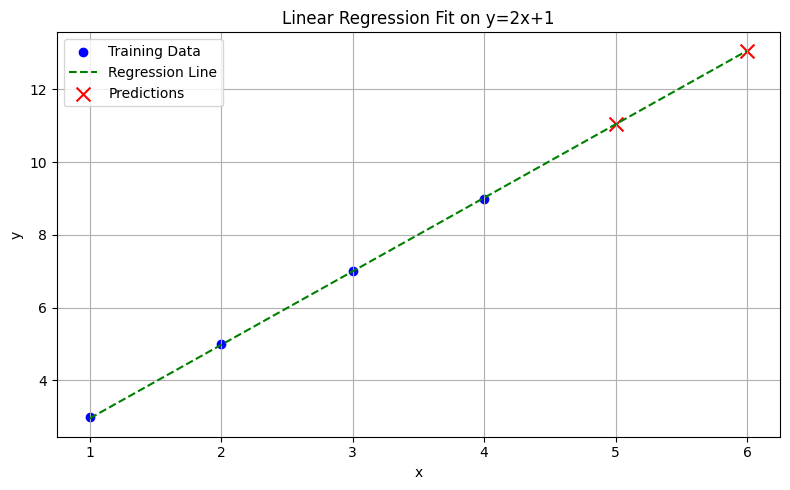

In [32]:
import matplotlib.pyplot as plt

# Sample data --> y = 2x + 1
x = [1, 2, 3, 4]
y = [3, 5, 7, 9]

# Train model
model = LinearRegression()
model.fit(x, y, alpha=0.1, epochs=100, verbose=25)

# Predict 
x_test = [5, 6]
predictions = model.predict(x_test)

# Output results
print() 
print(" Model Stats ".center(30, "="))
theta_0, theta_1 = model.coefficients()
print(f"Slope: {theta_1}")
print(f"Intercept: {theta_0}")
print(f"Regression Line: y = {theta_0:.4f} + {theta_1:.4f}x")
print(f"MSE: {model.mse(x, y)}")

print()
print(" Testing ".center(30, "="))
print("Predictions on test data: ")
for i in range(len(x_test)):
    x_val = x_test[i]
    y_pred = predictions[i]
    print(f"\tx = {x_val} -> y = {y_pred:.4f}")


# Plot
print()
print(" Plotting Results ".center(30, "="))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x + x_test, model.predict(x + x_test), color='green', linestyle='--', label='Regression Line')
plt.scatter(x_test, predictions, color='red', marker='x', s=100, label='Predictions')

plt.title("Linear Regression Fit on y=2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()  

### Test #2: Real Dataset - Diabetes


============ Data ============
     target       bmi
0     151.0  0.061696
1      75.0 -0.051474
2     141.0  0.044451
3     206.0 -0.011595
4     135.0 -0.036385
..      ...       ...
437   178.0  0.019662
438   104.0 -0.015906
439   132.0 -0.015906
440   220.0  0.039062
441    57.0 -0.073030

[442 rows x 2 columns]


======= Model Training =======
Epoch: 1/10000, MSE: 25649.508731, theta_0: 15.4779, theta_1: 0.2562
Epoch: 500/10000, MSE: 5770.307690, theta_0: 154.6034, theta_1: 109.1160
Epoch: 1000/10000, MSE: 5394.880603, theta_0: 154.4441, theta_1: 205.9459
Epoch: 1500/10000, MSE: 5097.852874, theta_0: 154.3024, theta_1: 292.0741
Epoch: 2000/10000, MSE: 4862.852591, theta_0: 154.1764, theta_1: 368.6833
Epoch: 2500/10000, MSE: 4676.926740, theta_0: 154.0643, theta_1: 436.8256
Epoch: 3000/10000, MSE: 4529.827249, theta_0: 153.9646, theta_1: 497.4368
Epoch: 3500/10000, MSE: 4413.446122, theta_0: 153.8759, theta_1: 551.3491
Epoch: 4000/10000, MSE: 4321.368530, theta_0: 153.7971, theta_

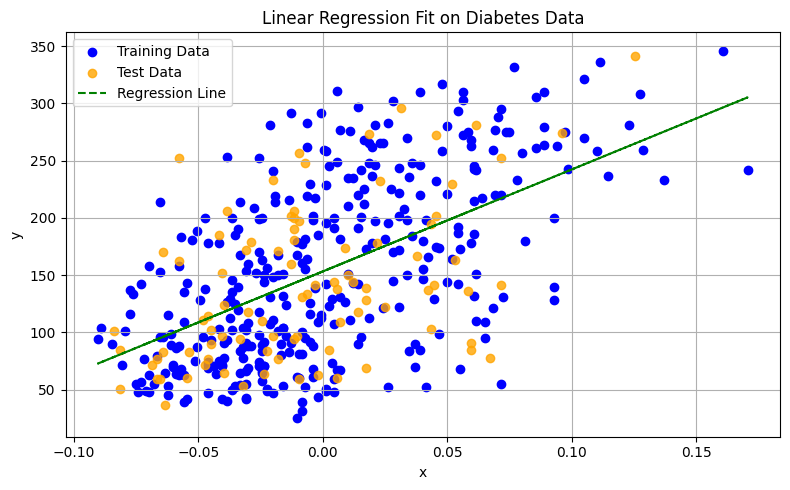

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load data
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame[['target', 'bmi']]

print(" Data ".center(30, "="))
print(f"{df}\n\n")
x = df['bmi'].to_list()
y = df['target'].to_list()


# Train/Test split --> 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=69)

# Train model
print(" Model Training ".center(30, "="))
model = LinearRegression()
model.fit(x_train, y_train, alpha=0.1, epochs= 10_000, verbose=500)

# Predict
y_pred = model.predict(x_test)


# Output model stats
print() 
print(" Model Stats ".center(30, "="))
theta_0, theta_1 = model.coefficients()
print(f"Slope: {theta_1}")
print(f"Intercept: {theta_0}")
print(f"Regression Line: y = {theta_0:.4f} + {theta_1:.4f}x")
print(f"MSE: {model.mse(x, y)}")

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Coefficient of determination --> how much of the variance in y is explained by the model 

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


# Plot
print()
print(" Plotting Results ".center(30, "="))

plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='orange', alpha=0.8, label='Test Data')
plt.plot(x, model.predict(x), color='green', linestyle='--', label='Regression Line')

plt.title("Linear Regression Fit on Diabetes Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
